# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



# claims_id column. 

In [7]:
import pandas as pd

df = pd.read_csv('food_claims_2212.csv')

total_entries = df['claim_id'].count()

unique_entries = df['claim_id'].nunique()

null_entries = df['claim_id'].isnull().sum()

print("Total entries in 'claim_id' column:", total_entries)
print("Unique entries in 'claim_id' column:", unique_entries)
print("Null entries in 'claim_id' column:", null_entries)

Total entries in 'claim_id' column: 2000
Unique entries in 'claim_id' column: 2000
Null entries in 'claim_id' column: 0


The output of this code shows that there are 2000 unique entries in the claim_id column and that the column has no null values. Throughout this project I will use the pandas library in order to view and manipulate the food_claims_2212.csv file.  I utilized the .count() method to find the total number of entries in the column. I then went on to use the .nunique() method to get a count of the unique entries in the column. As the output is the same as the output using the .count() method, it can be assumed that all the entries are unique. Finally, I used both the .isnull() and .sum() methods in order to get a count of the null values found in the column. The output is 0, showing that there are no null values. The data is as described in the rubric and requires no further modification

# Checking/Validating the time_to_close column. 

In [5]:
import pandas as pd

data = pd.read_csv('food_claims_2212.csv')


null_count = data['time_to_close'].isnull().sum()

print(f"Number of null values in {'time_to_close'}: {null_count}")


Number of null values in time_to_close: 0


In [9]:
SELECT DISTINCT COUNT(time_to_close) AS ttc_count FROM food_claims_2212.csv
WHERE time_to_close IS NOT NULL;

,ttc_count
0,2000


In [10]:
SELECT COUNT(time_to_close) AS count_neg_ttc FROM food_claims_2212.csv
WHERE time_to_close < 0;

,count_neg_ttc
0,0


Both the output of the Python and the SQL queries confrim that there are no null or negative values in the 'time_to_close' column. In the python code snippet, I used the .isnull() and .sum() methods to gain a count of the null values in the time_to_close column. In the first SQL Query, I uzilized the DISTINCT COUNT, and WHERE functions in order to discover the number of unique entries that are not null. In the second query, I used the COUNT and WHERE functions to get a count of the entries that have a value less than zero. All data in the column complies with the rubric and needs no alteration. 

# Checking/Validating the claim_amount column. 

In [11]:
import pandas as pd

df = pd.read_csv('food_claims_2212.csv')

total_entries = df['claim_amount'].count()
unique_entries = df['claim_amount'].nunique()
null_entries = df['claim_amount'].isnull().sum()

print("Total entries in 'claim_amount' column:", total_entries)
print("Unique entries in 'claim_amount' column:", unique_entries)
print("Null entries in 'claim_amount' column:", null_entries)

df['non_numeric_chars'] = df['claim_amount'].str.extract(r'([^0-9.])', expand=False)
df['claim_amount'] = df['claim_amount'].str.replace(r'[^0-9.]', '')

df['claim_amount'] = pd.to_numeric(df['claim_amount'])

df['claim_amount'] = df['claim_amount'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)

df['claim_amount'] = df['claim_amount'].astype(str)

df['claim_amount'] = df['claim_amount'].apply(lambda x: '{:.2f}'.format(float(x)) if len(x.split('.')[-1]) == 1 else x)


df['claim_amount'] = df['non_numeric_chars'].fillna('')+ '$' +' ' + df['claim_amount']

df = df.drop(columns=['non_numeric_chars'])

print(df['claim_amount'])

Total entries in 'claim_amount' column: 2000
Unique entries in 'claim_amount' column: 2000
Null entries in 'claim_amount' column: 0
0       R$ 74474.55
1       R$ 52137.83
2       R$ 24447.20
3       R$ 29006.28
4       R$ 19520.60
           ...     
1995    R$ 28982.30
1996     R$ 5188.44
1997    R$ 11975.85
1998    R$ 23516.28
1999     R$ 8051.40
Name: claim_amount, Length: 2000, dtype: object


The output shows that there are no duplicate or null entries in the claim_amount column. I implemented a similar process used to analyze the claim_id column, utilizng the .count(), .nunique(), .isnull(), and .sum() methods to find the number total entires, unique entries, and null entries respectively. I utilized the str.extract() method to extract the non-numeric characters (except for decimals) of the column and store them. I then used the str.replace() method to remove the non-numeric characters from the claim_amount column. Once this was completed, I could succesfully convert the column to a numeric type without any errors using the to_numeric() function. I procceded to use .apply and .notnull in order to round all the values to the second decimal. Once this was completed I utilized the .astype() method to convert the column back to a string. There were some values in the column that only had one decimal place, to remedy this, I added a zero to any entry that only went to the tenth decimal. I then proceeded to re-insert the stored non numeric characters back into the converted column. After this was done, I dropped the nonnmeric character column. The data now complies with the rubric and needs no further alteration.

# Checking/Validating the amount_paid column. 

In [12]:
import pandas as pd

data = pd.read_csv('food_claims_2212.csv')

data.replace('', pd.NA, inplace=True)

null_count = data['amount_paid'].isnull().sum()
print(f"Number of null values in 'amount_paid': {null_count}")

negative_count = df[df['amount_paid'] < 0]['amount_paid'].count()
print("Number of negative values in 'amount_paid' column:", negative_count)

df['amount_paid'] = df['amount_paid'].round(2)

median_value = data['amount_paid'].median()
data['amount_paid'].fillna(median_value, inplace=True)

altered_count = null_count - data['amount_paid'].isnull().sum()
print("Number of entries altered:", altered_count)

Number of null values in 'amount_paid': 36
Number of negative values in 'amount_paid' column: 0
Number of entries altered: 36


There are 36 null values and no negative values in the amount_paid column. I used the pd.read_csv() method in order to open the .csv file while utilizng data.replace() to replace empty values with 'NA.' I then utilized .isnull() and .sum() to generate a count of the null values in the amount_paid column. After storing the count of negative values in negative_count, I used the .round() meethod to ensure all the values in the column are rounded to the second decimal. I then used data[].median() and data[].fillna() methods in order to calculate the median value of the amount_paid column and replace any null entry in the column with the median value. I then calculated the number of entries that were changed by subtracting the pre-replacement null count from the post-replacement null count

# Location

In [2]:
import pandas as pd

df = pd.read_csv('food_claims_2212.csv')

df.replace('', pd.NA, inplace=True)

null_count = df['location'].isnull().sum()
print(f"Number of null values in '{ 'location'}': {null_count}")

print(df['location'].unique())

count_entries_recife = df[df['location'].str.contains('RECIFE')]['location'].count()
print("Number of entries containing 'RECIFE':", count_entries_recife)

count_entries_sao_luis = df[df['location'].str.contains('SAO LUIS')]['location'].count()
print("Number of entries containing 'SAO LUIS':", count_entries_sao_luis)

count_entries_fortaleza = df[df['location'].str.contains('FORTALEZA')]['location'].count()
print("Number of entries containing 'FORTALEZA':", count_entries_fortaleza)

count_entries_natal = df[df['location'].str.contains('NATAL')]['location'].count()
print("Number of entries containing 'NATAL':", count_entries_natal)

count_entries_combined = df[df['location'].str.contains('RECIFE|SAO LUIS|FORTALEZA|NATAL')]['location'].count()
print("Number of entries containing 'RECIFE', 'SAO LUIS', 'FORTALEZA', or 'NATAL':", count_entries_combined)


Number of null values in 'location': 0
['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
Number of entries containing 'RECIFE': 885
Number of entries containing 'SAO LUIS': 517
Number of entries containing 'FORTALEZA': 311
Number of entries containing 'NATAL': 287
Number of entries containing 'RECIFE', 'SAO LUIS', 'FORTALEZA', or 'NATAL': 2000


There are no missing values in the location column

There are 885 entries in location that read "RECIFE." I used the str.contains() method to search for instances of "RECIFE" in the location column. Once this was done, I used the count() method to count the number of entries that satisfy the condition and print the result.

There are 517 entries in location that read "SAO LUIS." I used the same the code that was used to find the count of entries that read "RECIFE" but replaced all instances of "RECIFE" with "SAO LUIS." I used the str.contains() method to search for instances of "SAO LUIS" in the location column. Once this was done, I used the count() method to count the number of entries that satisfy the condition and print the result.

There are 311 entries in location that read "FORTALEZA." I used the same the code that was used to find the count of entries that read "RECIFE" but replaced all instances of "RECIFE" with "FORTALEZA." I used the str.contains() method to search for instances of "FORTALEZA" in the location column. Once this was done, I used the count() method to count the number of entries that satisfy the condition and print the result.

There are 287 entries in location that read "NATAL." I used the same the code that was used to find the count of entries that read "RECIFE" but replaced all instances of "RECIFE" with "NATAL." I used the str.contains() method to search for instances of "NATAL" in the location column. Once this was done, I used the count() method to count the number of entries that satisfy the condition and print the result.

The output of this code once again confirms that there are no missing values in this column. In this code I used the str.contains() method to search for instances 'RECIFE', 'SAO LUIS', 'FORTALEZA', or 'NATAL' by using the '|' to represent the OR operator. I then used the count() method to determine the number of entries. There are no further alterations needed for this column

# linked_cases

In [14]:
import pandas as pd

df = pd.read_csv('food_claims_2212.csv')

null_count =df['linked_cases'].isnull().sum()

print("Number of null values in 'linked_cases' column:", null_count)

altered_entries = null_count

df['linked_cases'] = df['linked_cases'].fillna(False)

print('Number of entries altered:', altered_entries)
print(df['linked_cases'].unique())

Number of null values in 'linked_cases' column: 26
Number of entries altered: 26
[False  True]


In [15]:
SELECT COUNT(linked_cases) FROM food_claims_2212.csv
WHERE linked_cases = 'NA' ;

,count(linked_cases)
0,26


In [16]:
SELECT COUNT(*) AS true_count FROM food_claims_2212.csv
WHERE linked_cases = 'TRUE';

,true_count
0,481


In [17]:
SELECT COUNT(*) AS False_count FROM food_claims_2212.csv
WHERE linked_cases = 'FALSE'

,False_count
0,1493


The output of this code shows that there are 26 missing values in the linked_cases column. I used isnull() method is used on 'linked_cases' column of the DataFrame. This returns True for null values and False for non-null values. From here
The sum() method is used to count the number of True values, which represent null values in the 'linked_cases' column. The 1st SQL query confirms this by outputting a count of the entries in the linked_cases column the contains "NA"

The output of the 2nd query shows that there are 481 entries in the linked_cases column that reads 'TRUE' I used the COUNT function to count all entries while using the WHERE clause to filter out all entries except for one's the contain 'TRUE' in the linked_cases column.

The output of the 3rd query shows that there are 1493 entries in the linked_cases column that reads 'FALSE' I used the same method used to find the number of TRUE values. I utilized COUNT function to count all entries where using the WHERE clause to filter out all entries except for one's the contain 'FALSE' in the linked_cases column.

The sum of 481 and 1493 is 1974. The difference between 2000 and 1974 is 26, again confirming there is 26 missing values.

The null values have been replaced with False using the .fillna() method. I then used .unique() method to ensure that 'True' and 'False' are the only values found in the linked_cases column. No further alteration is needed.

# Indviduals_on_claim

In [18]:
import pandas as pd

df = pd.read_csv('food_claims_2212.csv')

null_count = df['individuals_on_claim'].isnull().sum()

print("Number of null values in 'individuals_on_claim' column:", null_count)

Number of null values in 'individuals_on_claim' column: 0


The output of this code shows that there are no missing values in the individuals_on_claim column. I used isnull() method on the 'individuals_on_claim' column of the DataFrame. This returns True for null values and False for non-null values. From here
The sum() method is used to count the number of True values, which represent null values in the 'individuals_on_claim' column. 

In [19]:
SELECT COUNT(*) AS neg_ioc FROM food_claims_2212.csv 
WHERE individuals_on_claim < 1;

,neg_ioc
0,0


The output of the SQL query confirms that the entries in the individuals_on_claim column contains no values less than 1. I used the COUNT function to count all rows in the food_claims_2212 table while using the WHERE clause to only select entries in the individuals_on_claim column that had a value less than 1. No further alteration are required

# Cause

In [3]:
import pandas as pd

df = pd.read_csv('food_claims_2212.csv')

null_count = df['cause'].isnull().sum()
print("Number of null values in 'cause' column:", null_count)

print(df['cause'].unique())

count_meat = df['cause'].value_counts().get('meat', 0)
print("Number of occurrences of 'meat' in the 'cause' column:", count_meat)

count_veggie = df['cause'].value_counts().get('vegetable', 0)
print("Number of occurrences of 'vegetable' in the 'cause' column:", count_veggie)

count_unknown = df['cause'].value_counts().get('unknown', 0)
print("Number of occurrences of 'unknown' in the 'cause' column:", count_unknown)

total_count = count_unknown + count_meat + count_veggie
print("Total count:", total_count)

df['cause'] = df['cause'].replace('VEGETABLES', 'vegetable')
df['cause'] = df['cause'].replace(' Meat', 'meat')

new_count_meat = df['cause'].value_counts().get('meat', 0)
print("Number of occurrences of 'meat' in the 'cause' column:", new_count_meat)

new_count_veggie = df['cause'].value_counts().get('vegetable', 0)
print("Number of occurrences of 'vegetable' in the 'cause' column:", new_count_veggie)

print(df['cause'].unique())

Number of null values in 'cause' column: 0
['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']
Number of occurrences of 'meat' in the 'cause' column: 943
Number of occurrences of 'vegetable' in the 'cause' column: 314
Number of occurrences of 'unknown' in the 'cause' column: 713
Total count: 1970
Number of occurrences of 'meat' in the 'cause' column: 957
Number of occurrences of 'vegetable' in the 'cause' column: 330
['unknown' 'meat' 'vegetable']


The output of this code shows that there are no missing values in the cause column. I used isnull() method on the column alongside the sum() method to count the number of null values in the column. While there are no missing entries, using the .unique() method we can see that there are entries that are not compliant with the rubric ('Meat', and 'VEGETABLE').

There are 943 values in the cause column classified as 'meat.' The value_counts() method is used on the 'cause' column of the DataFrame. Using this with the .get() method counts the number of times 'meat'appears in the cause column. The count of 'meat' instances is defined as count_meat. 

There are 314 values in the cause column classified as 'vegetable.' I implemented the same method used to find the number of values classifed as 'meat'. The value_counts() method is used on the 'cause' column of the DataFrame. Using this with the .get() method counts the number of times vegetable appears in the cause column. The count of 'vegetable' instances is defined as count_veggie. 

There are 713 values in the cause column classified as 'unknown.' I used the same method used to find the number of values classifed as 'meat'. The value_counts() method is used on the 'cause' column of the DataFrame. Using this with the .get() method counts the number of times unknown appears in the cause column. The count of 'unknown' instances is defined as count_unknown. 

The code output counts of the of instances of 'meat', 'vegetable',and 'unknown' and returns the sum of those counts. The output states that there are 30 entries that are not counted. As we have already confirmed that there are no null values, it can be assumed that the 30 entries are the instances of 'Meat' and 'VEGETABLE' which do not match the description rubric

 I utilized the .replace() method on the 'cause' column in order to replace all occurrences of 'VEGETABLES' with 'vegetable' and all instances of 'Meat' with 'meat. I then repeated collecting counts of instances of 'meat' and 'vegetable' as well as repeating the .unique method to confirm that the changes were made correctly and that unknown, meat, and vegetables are the only values in column. The values in the column now comply with the rubric and no further alterations are needed

## Task 2

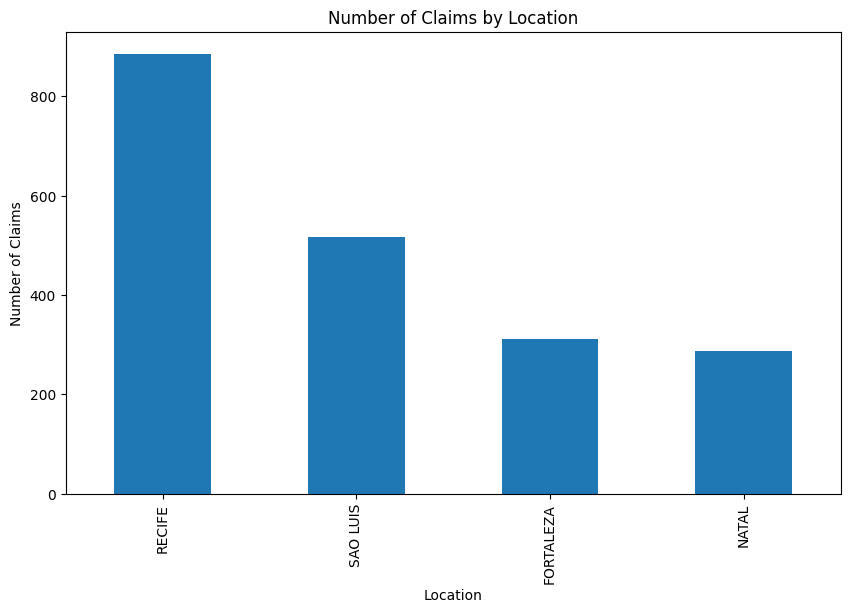

Category with the most observations: RECIFE


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('food_claims_2212.csv')

claim_counts = df['location'].value_counts()

plt.figure(figsize=(10, 6))
claim_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims by Location')
plt.show()

most_observations = claim_counts.idxmax()

print("Category with the most observations:", most_observations)


I utilzed pyplot, a sub-module of matplotlib to create the visualizations in this project. Based on the output, the Recife location has the highest number of claims. I utilized the value_counts() method in order to get a count of each value in the location column and stored it as claim_counts. I then utlized the idxmax() on claim_counts in order to find the value with the highest count. The observations are not balanced as the number of claims is significantly higher in the Recife location

## Task 3

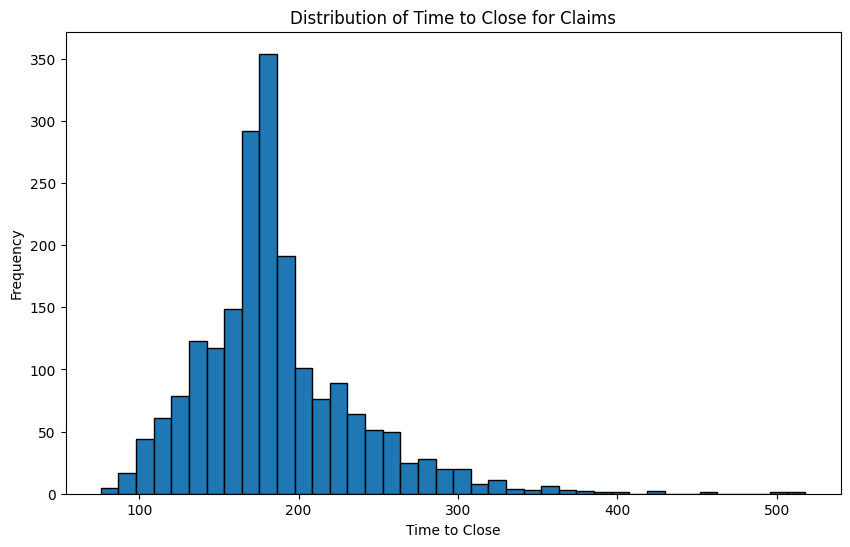

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('food_claims_2212.csv')

filtered_df = df[df['time_to_close'].notnull()]

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['time_to_close'], bins= 40, edgecolor='k')
plt.xlabel('Time to Close')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for Claims')
plt.show()

Based on the visualization, the histogram shows that there is a right skewed distribution for the time to close. The majority of claims are closed anywhere between 150 to 250 days.  I chose to use a histogram due to it's advantage at visualizng distributions. 

## Task 4

<Figure size 1000x600 with 0 Axes>

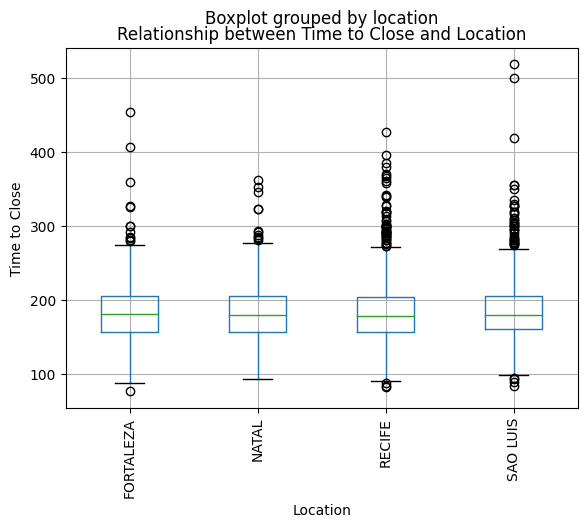

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('food_claims_2212.csv')

filtered_df = df[df['time_to_close'].notnull()]

plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='time_to_close', by='location')
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Relationship between Time to Close and Location')
plt.xticks(rotation=90)
plt.show()


Based on the visualization, we can tell that all four locations have similar average times to close at 180 days. Based on the visualization, there appears to be no significant relationship between a location and the time to close a claim.